# Trending YouTube Video EDA

## 1. Preprocess and Clean Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
path = "./data/GBvideos.csv"
GBVideos = pd.read_csv(path)

### 1.1 Convert Category_id to Category names

In [2]:
import json
f = open("./data/GB_category_id.json")
data = f.read()
f.close()
out = json.loads(data)
categories = pd.DataFrame([
    {'category_id':x['id'],
     'category':x['snippet']['title'],
     'assignable':x['snippet']['assignable']
    } for x in out['items']
])
categories['category_id'] = categories['category_id'].astype(int)
categories.head()

,category_id,category,assignable
0,1,Film & Animation,True
1,2,Autos & Vehicles,True
2,10,Music,True
3,15,Pets & Animals,True
4,17,Sports,True


In [3]:
GBVideos['category_id'] = GBVideos['category_id'].astype(int)
GBVideos = GBVideos.merge(categories, on='category_id')
GBVideos.drop(['assignable','category_id'], axis=1)
GBVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,assignable
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,True
1,MyEqfBkzESU,17.14.11,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10T20:40:44.000Z,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,2911,https://i.ytimg.com/vi/MyEqfBkzESU/default.jpg,False,False,False,-\n\n\nWebsite - http://www.johnmaclean.co.uk\...,Howto & Style,True
2,b4vTZx_AtHk,17.14.11,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09T18:36:48.000Z,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,11443,https://i.ytimg.com/vi/b4vTZx_AtHk/default.jpg,False,False,False,Today I show you how to completely dry a shirt...,Howto & Style,True
3,OWvCCu2t6Ts,17.14.11,SO Much To Tell You | 32 Weeks Pregnant | MOTH...,Sprinkleofglitter,26,2017-11-10T16:59:50.000Z,"sprinkleofglitter|""sprinkle of glitter""|""Louis...",238843,10028,248,650,https://i.ytimg.com/vi/OWvCCu2t6Ts/default.jpg,False,False,False,A big chat about everything going on in my pre...,Howto & Style,True
4,9GqL1DSQDL0,17.14.11,GET READY WITH ME + LILY! (we're so immature bye),makeupbymichaelfinch,26,2017-11-09T22:00:00.000Z,"Lily brown|""michael finch""|""makeupbymichaelfin...",332967,22303,700,1523,https://i.ytimg.com/vi/9GqL1DSQDL0/default.jpg,False,False,False,Hey babes! Happy Friday! It's the WEEKENDDD He...,Howto & Style,True


### 1.2 Clean Data, fill nan value and drop duplicates

In [4]:
GBVideos.fillna(" ",inplace=True)
GBVideos = GBVideos.drop_duplicates()
GBVideos = GBVideos.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
GBVideos.head(3)

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,assignable
video_id,,,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,0,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style,True
MyEqfBkzESU,1,17.14.11,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10T20:40:44.000Z,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,2911,https://i.ytimg.com/vi/MyEqfBkzESU/default.jpg,False,False,False,-\n\n\nWebsite - http://www.johnmaclean.co.uk\...,Howto & Style,True
b4vTZx_AtHk,2,17.14.11,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09T18:36:48.000Z,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,11443,https://i.ytimg.com/vi/b4vTZx_AtHk/default.jpg,False,False,False,Today I show you how to completely dry a shirt...,Howto & Style,True


In [5]:
GBVideos.describe()

,index,category_id,views,likes,dislikes,comment_count
count,3266.000000,3266.000000,3.266000e+03,3.266000e+03,3266.000000,3266.000000
mean,18814.706981,17.972137,1.293765e+06,5.410735e+04,2312.178812,6281.892529
std,11959.127580,7.507147,4.386501e+06,1.687121e+05,16595.867855,27732.638350
min,0.000000,1.000000,8.510000e+02,0.000000e+00,0.000000,0.000000
25%,7856.750000,10.000000,8.902400e+04,2.516750e+03,73.000000,324.250000
50%,18086.000000,22.000000,2.796270e+05,8.432500e+03,251.500000,1026.500000
75%,29429.750000,24.000000,9.689270e+05,3.550700e+04,1021.750000,3675.750000
max,38788.000000,28.000000,1.434082e+08,3.880074e+06,629123.000000,733371.000000


## 2.Process Trending Date and Publish Time

### 2.1 Change "trending_date" and "publish_time" to proper data format.

In [6]:
GBVideos["trending_date"] = pd.to_datetime(GBVideos["trending_date"],errors='coerce',format="%y.%d.%m")
GBVideos["publish_time"] = pd.to_datetime(GBVideos["publish_time"],errors='coerce')

### 2.2 Create some New columns for time analysis.

In [130]:
#Create some New columns for time analysis.
GBVideos["trending_year"] = GBVideos["trending_date"].apply(lambda time:time.year).astype(int)
GBVideos["trending_month"] = GBVideos["trending_date"].apply(lambda time:time.month).astype(int)
GBVideos["trending_day"] = GBVideos["trending_date"].apply(lambda time:time.day).astype(int)
GBVideos["trending_week_day"] = GBVideos["trending_date"].apply(lambda time:time.dayofweek).astype(int)
GBVideos["publish_year"] = GBVideos["publish_time"].apply(lambda time:time.year).astype(int)
GBVideos["publish_month"] = GBVideos["publish_time"].apply(lambda time:time.month).astype(int)
GBVideos["publish_day"] = GBVideos["publish_time"].apply(lambda time:time.day).astype(int)
GBVideos["publish_Week_day"]= GBVideos["publish_time"].apply(lambda time:time.dayofweek).astype(int)
GBVideos["publish_hour"] = GBVideos["publish_time"].apply(lambda time:time.hour).astype(int)

### 2.3 New Data Frame Created But day of week in numeric format we need to convert it.astype(int)

In [131]:
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}#We're Using this Dictionary to Map our column
GBVideos["publish_Week_day"] = GBVideos["publish_Week_day"].map(dmap1)
GBVideos["trending_week_day"] = GBVideos["trending_week_day"].map(dmap1)
GBVideos.head(3)

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,assignable,trending_year,trending_month,trending_day,trending_week_day,publish_year,publish_month,publish_day,publish_Week_day,publish_hour
video_id,,,,,,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,0,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,True,2017,11,14,Tue,2017,11,10,Fri,7
MyEqfBkzESU,1,2017-11-14,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10 20:40:44+00:00,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,...,True,2017,11,14,Tue,2017,11,10,Fri,20
b4vTZx_AtHk,2,2017-11-14,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09 18:36:48+00:00,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,...,True,2017,11,14,Tue,2017,11,9,Thu,18


## 3. Word Cloud for Trending Tags

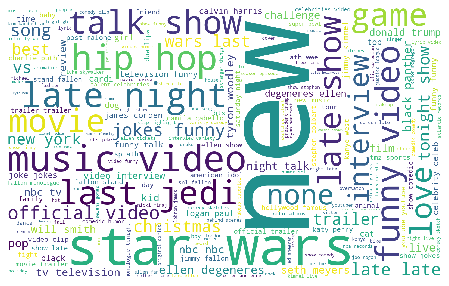

In [9]:
tags = GBVideos['tags'].map(lambda x:x.lower().split('|')).values
splt_tags = ' '.join(GBVideos['tags'])
wordcloud = WordCloud(width=1600,height=1000, background_color="white").generate(' '.join(splt_tags.lower().split('|')))

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

wordcloud.to_file('./figures/tagcloud.png')

In [10]:
GBVideos_gb = GBVideos.groupby('category').count()['title']
GBVideos_gb = GBVideos_gb.rename(columns=['category','count']).sort_values()
index = GBVideos_gb.index.get_level_values(0).tolist()
GBVideos_gb = GBVideos_gb.reset_index()
values = GBVideos_gb[0].tolist()

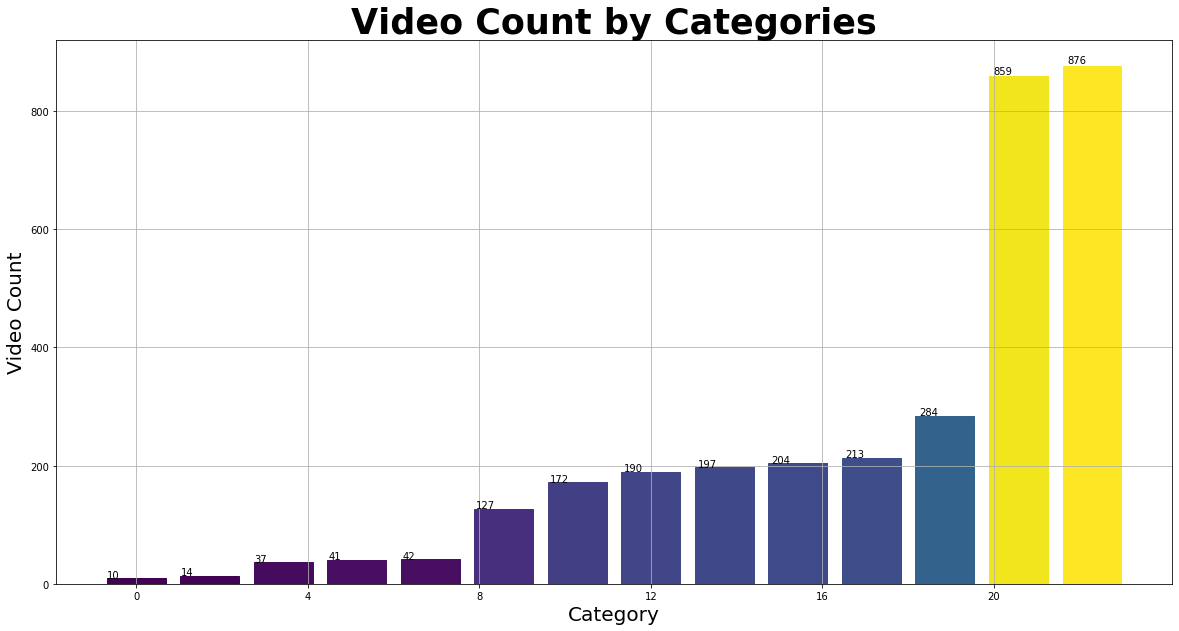

In [11]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(index, values)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Video Count', fontsize=20)
plt.xlabel('Category', fontsize=20)
plt.title('Video Count by Categories', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(index), len(index)/6), [0, 4, 8, 12, 16, 20])
plt.savefig('./figures/category_count.png')
plt.show()

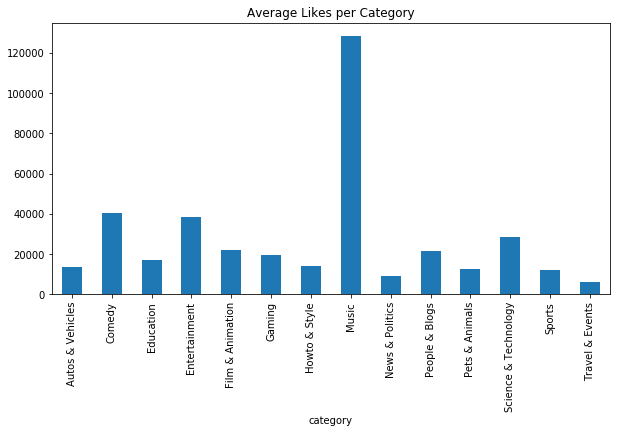

In [12]:
GBVideos_likes = GBVideos.sort_values('likes', ascending=False).sort_index()
GBVideos_likes.groupby('category').likes.mean().plot(kind="bar", figsize=(10,5))
plt.title("Average Likes per Category")
plt.savefig('./figures/avglikes_category.png')
plt.show()

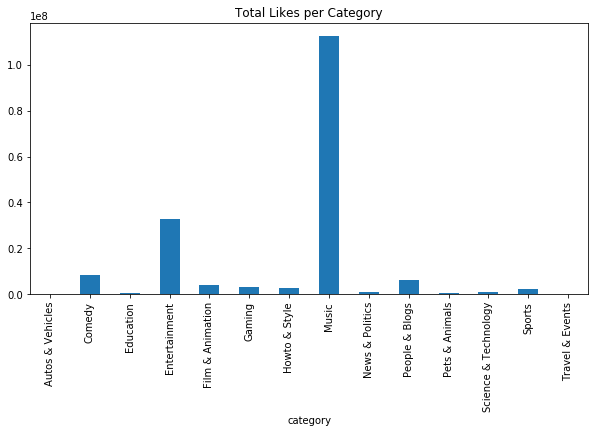

In [13]:
GBVideos_likes.groupby('category').likes.sum().plot(kind="bar",figsize=(10,5))
plt.title("Total Likes per Category")
plt.savefig('./figures/totallikes_category.png')
plt.show()

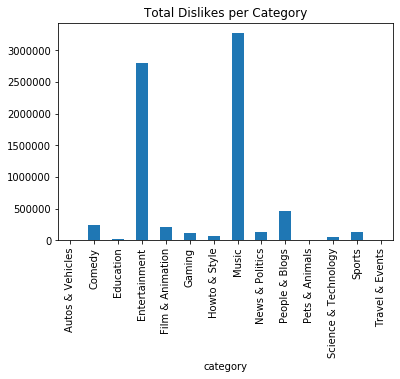

In [14]:
GBVideos_likes.groupby('category').dislikes.sum().plot(kind="bar")
plt.title("Total Dislikes per Category")
plt.savefig('./figures/total_dislikes_category.png')
plt.show()

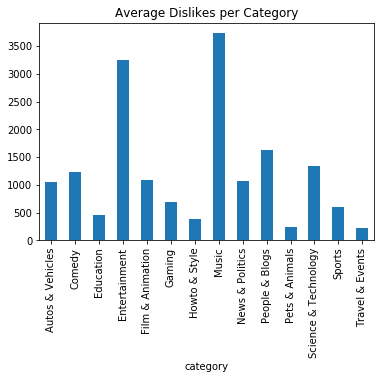

In [15]:
GBVideos_likes.groupby('category').dislikes.mean().plot(kind="bar")
plt.title("Average Dislikes per Category")
plt.savefig('./figures/avg_dislikes_category.png')
plt.show()

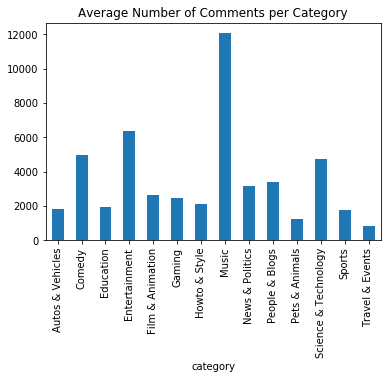

In [16]:
GBVideos_likes.groupby('category').comment_count.mean().plot(kind="bar")
plt.savefig('./figures/avg_comment_category.png')
plt.title("Average Number of Comments per Category")
plt.show()

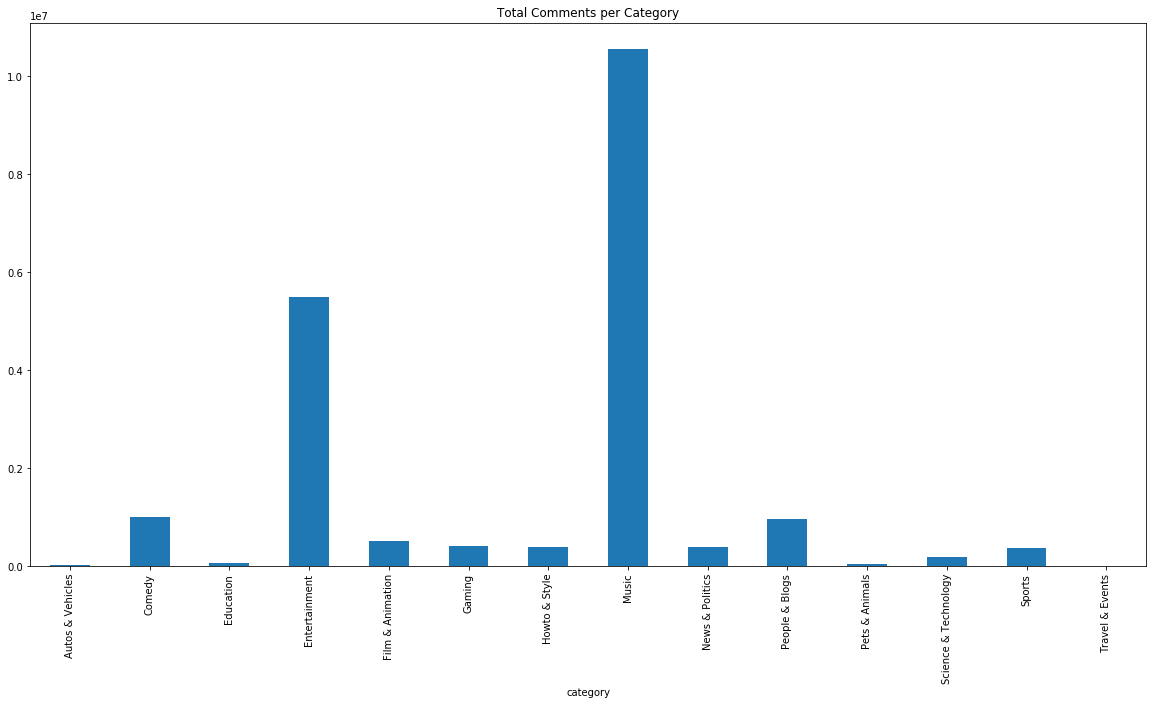

In [17]:
GBVideos_likes.groupby('category').comment_count.sum().plot(kind="bar", figsize=(20,10))
plt.title("Total Comments per Category")
plt.savefig('./figures/total_comment_category.png', fontsize=35, fontweight='bold')
plt.show()

## 5. Best Time to Publish a Video

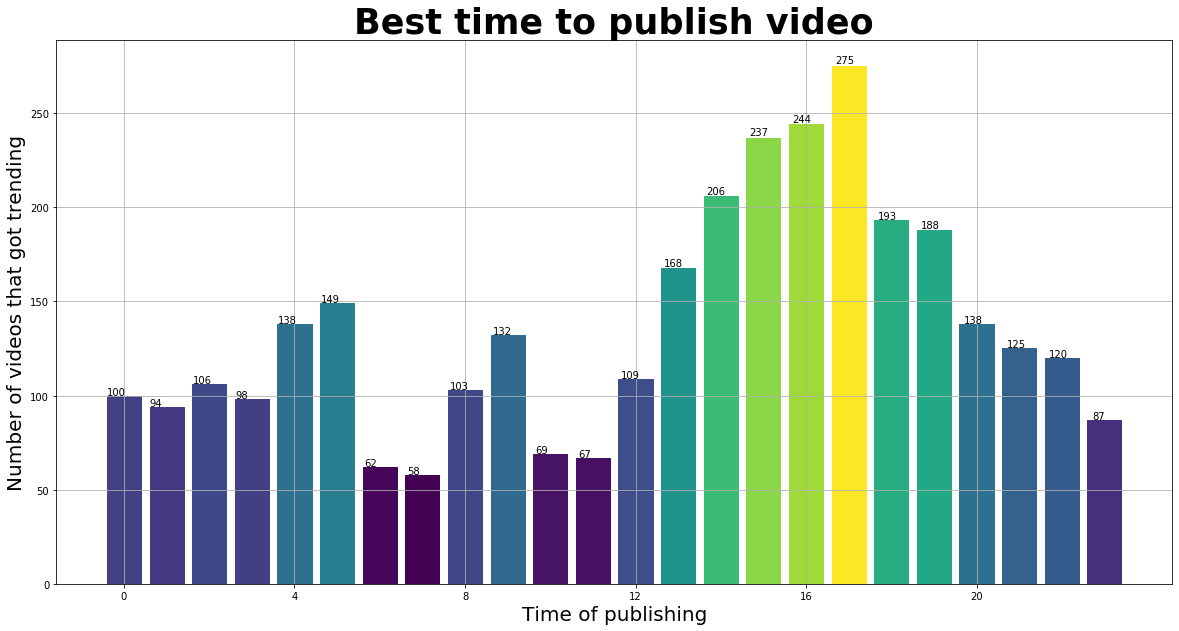

In [18]:
publish_h = [0] * 24

for index, row in GBVideos.iterrows():
    publish_h[row["publish_hour"]] += 1
    
values = publish_h
ind = np.arange(len(values))

# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])
plt.savefig('./figures/best_time_to_publish.png')
plt.show()

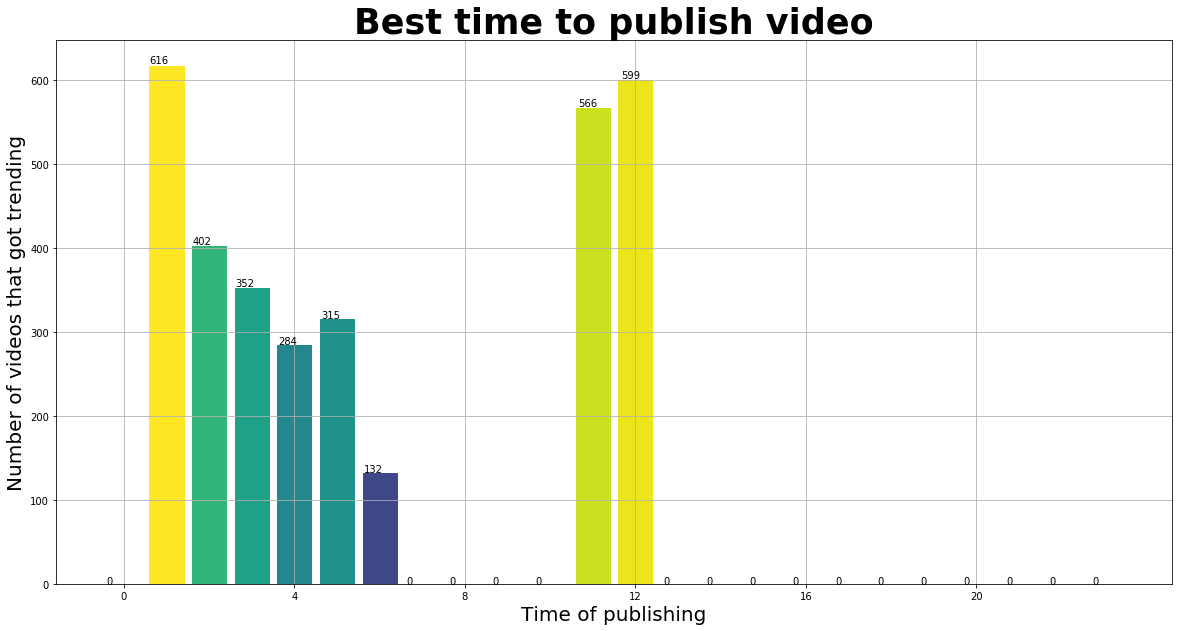

In [19]:
publish_h = [0] * 24

for index, row in GBVideos.iterrows():
    publish_h[row["trending_month"]] += 1
    
values = publish_h
ind = np.arange(len(values))

# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])
plt.savefig('./figures/month_trending_count.png')
plt.show()

## 6. Views, Likes, Dislikes, and Comments Correlation HeatMap

In [20]:
column_list = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = GBVideos[column_list].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.689176,0.370521,0.437346
likes,0.689176,1.000000,0.391994,0.794756
dislikes,0.370521,0.391994,1.000000,0.713932
comment_count,0.437346,0.794756,0.713932,1.000000


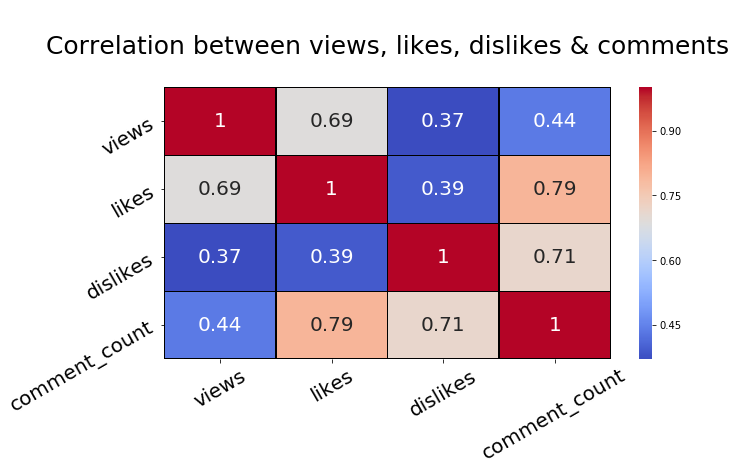

In [21]:
from matplotlib import cm
plt.figure(figsize = (10,5))

ax = sns.heatmap(GBVideos[['views', 'likes', 'dislikes', 'comment_count']].corr(), \
            annot=True, annot_kws={"size": 20}, cmap=cm.coolwarm, linewidths=0.5, linecolor='black')
plt.yticks(rotation=30, fontsize=20) 
plt.xticks(rotation=30, fontsize=20) 
plt.title("\nCorrelation between views, likes, dislikes & comments\n", fontsize=25)
plt.savefig('./figures/view_likes_dislikes_comments_corr.png')
plt.show()

## Plotly Interactive Visulizing

In [124]:
GBVideos_cat = GBVideos.groupby('category').mean()
GBVideos_cat = GBVideos_cat.reset_index()
GBVideos_cat.to_csv('./data/category_mean.csv')
GBVideos_cat['views'] = GBVideos_cat['views'].div(10000).round(2)

In [99]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.tools as tls

In [100]:
fig = px.scatter_3d(GBVideos_cat, x='likes', y='dislikes', z='comment_count', size='views', color='views',
                    hover_data=['category'])
fig.update_layout(scene_zaxis_type="log")
fig.show()

from ipywidgets import widgetsplotly.offline.plot(fig, filename='views_3d_scatter.html')

'views_3d_scatter.html'

In [57]:
GBVideos.columns

Index(['index', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'assignable',
       'trending_year', 'trending_month', 'trending_day', 'trending_week_day',
       'publish_year', 'publish_month', 'publish_day', 'publish_Week_day',
       'publish_hour'],
      dtype='object')

In [125]:
GBVideos_cat_trending = GBVideos.drop(['category_id', 'video_error_or_removed', 'description', 'channel_title', 'assignable', 'tags','thumbnail_link', 'comments_disabled', 'ratings_disabled', 'publish_time', 'publish_year', 'publish_month', 'publish_day', 'publish_Week_day',
       'publish_hour'], axis=1)
GBVideos_cat_trending.to_csv('./data/category_trending_time.csv')
fig = px.parallel_categories(GBVideos_cat_trending, width=900, height=600)
fig.show()
plotly.offline.plot(fig, filename='./html_plots/category_trending_time.html')

'./html_plots/category_trending_time.html'

In [68]:
GBVideos_cat_publish = GBVideos.drop(['category_id', 'video_error_or_removed', 'description', 'channel_title', 'assignable', 'tags','thumbnail_link', 'comments_disabled', 'ratings_disabled','trending_year', 'trending_month', 'trending_day', 'trending_week_day'], axis=1)
fig = px.parallel_categories(GBVideos_cat_publish, width=900, height=600)
fig.show()
plotly.offline.plot(fig, filename='./html_plots/category_publish_time.html')

'category_publish_time.html'

In [126]:
GBVideos_cat_publish = GBVideos.drop(['category_id', 'video_error_or_removed', 'description', 'channel_title', 'assignable', 'tags','thumbnail_link', 'comments_disabled', 'ratings_disabled','trending_year', 'trending_month', 'trending_day', 'trending_week_day'], axis=1)
GBVideos_cat_publish.to_csv('./data/category_publish_time.csv')

In [71]:
GBVideos_disabled = GBVideos.drop(['category_id', 'description', 'channel_title', 'assignable', 'tags','thumbnail_link','trending_year', 'trending_month', 'trending_day', 'trending_week_day', 'publish_time', 'publish_year', 'publish_month', 'publish_day', 'publish_Week_day'], axis=1)
fig = px.parallel_categories(GBVideos_disabled, width=900, height=600)
fig.show()
plotly.offline.plot(fig, filename='./html_plots/category_disabled.html')

'./html_plots/category_disabled.html'

In [132]:
categories = ['Music', 'Entertainment', 'People & Blogs']

fig1 = go.Figure()
fig2 = go.Figure()


for category in categories:
    fig1.add_trace(go.Violin(x=GBVideos['category'][GBVideos['category'] == category],
                            y=GBVideos['publish_month'][GBVideos['category'] == category],
                            name=category, box_visible=True, meanline_visible=True))

    fig2.add_trace(go.Violin(x=GBVideos['category'][GBVideos['category'] == category],
                            y=GBVideos['trending_month'][GBVideos['category'] == category],
                            name=category, box_visible=True, meanline_visible=True))

fig1.show()
fig2.show()

#plotly.offline.plot(fig1, filename='./html_plots/major_category_publish_month.html')
#plotly.offline.plot(fig2, filename='./html_plots/major_category_trending_month.html')

In [92]:
GBVideos_cat = GBVideos.groupby('category').mean()
GBVideos_cat = GBVideos_cat.reset_index()

fig = go.Figure(go.Histogram2dContour(
        x = GBVideos_cat['dislikes'],
        y = GBVideos_cat['likes']
))
fig.show()

fig1 = go.Figure(go.Histogram2dContour(
        x = GBVideos_cat['views'],
        y = GBVideos_cat['comment_count']
))
fig1.show()

fig2 = go.Figure(go.Histogram2dContour(
    x = GBVideos_cat['likes'],
    y = GBVideos_cat['dislikes'],
    colorscale = 'Jet',
    contours = dict(
        showlabels = True,
        labelfont = dict(
            family = 'Raleway',
            color = 'white')),
        hoverlabel = dict(
            bgcolor = 'white',
            bordercolor = 'black',
            font = dict(
                family = 'Raleway',
                color = 'black'))))
fig2.show()



In [134]:
GBVideos_channel = GBVideos.groupby(['channel_title']).count()
top_creators = GBVideos_channel.sort_values('title', ascending=False)
top_creators = top_creators.head(25).reset_index()

fig = px.bar(top_creators, x="title", y="channel_title", color='likes',width=900, height=600,
    orientation='h', title='Number of trending video made by Channels')
fig.show()

In [135]:
GBVideos_channel = GBVideos.groupby(['channel_title']).count()
top_creators = GBVideos_channel.sort_values('title', ascending=False)
top_creators = top_creators.head(25).reset_index()

fig = px.bar(top_creators, x="title", y="channel_title", color='dislikes',width=900, height=600,
    orientation='h', title='Number of trending video made by channels with dislikes')
fig.show()

In [133]:
fig = go.Figure()

for category_name, category in category_data.items():
    fig.add_trace(go.Scatter(
        x=category['likes'], y=category['dislikes'],
        name=category_name, text=category['text'],
        marker_size=category['size']))

fig.update_traces(mode='markers', 
    marker=dict(sizemode='area',
                sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Likes v. Dislikes',
    xaxis=dict(
        title='Likes',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Dislikes',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()
plotly.offline.plot(fig, filename='likes_vs_dislikes.html')

#mpld3.save_html(fig_html, 'likes_vs_dislikes.html')

NameError: name 'category_data' is not defined

In [0]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.title('Videos views according to their Likes and Dislikes', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Likes', fontsize=15)
plt.ylabel('Dislkes', fontsize=15)

likes = GBVideos["likes"].values
dislikes = GBVideos["dislikes"].values
views = GBVideos["views"].values

plt.scatter(likes, dislikes, s = 300, edgecolors='black')
plt.show()

In [0]:
import seaborn as snb
plt.figure(figsize=(12,8))
list5 = GBVideos.groupby(["category","publish_hour"]).count()["video_id"].unstack()
ax = snb.heatmap(list5, cmap=cm.coolwarm, linewidths=0.5, linecolor='black')
plt.yticks(rotation=30, fontsize=20) 
plt.xticks(rotation=30, fontsize=20) 
plt.title("\n5:00 AM GB Videos:)\n", fontsize=30)
plt.show()

In [0]:
entertainment_title = GBVideos["title"][(GBVideos['category'] == 'Entertainment')] 
news_politics_title = GBVideos["title"][(GBVideos['category'] == 'News & Politics')] 
people_title = GBVideos["title"][(GBVideos['category'] == 'People & Blogs')] 
music_title = GBVideos["title"][(GBVideos['category'] == 'Music')] 
sports_title = GBVideos["title"][(GBVideos['category'] == 'Sports')] 
comedy_title = GBVideos["title"][(GBVideos['category'] == 'Comedy')] 

In [0]:
import pyLDAvis

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from pyLDAvis import sklearn


vectorizer_entertainment_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
entertainment_title_vectorized = vectorizer_entertainment_title.fit_transform(entertainment_title)
lda_popular_entertainment_title_vectorized = LatentDirichletAllocation(
    n_components=7, max_iter=5, learning_method='online',verbose=True)
entertainment_title_vectorized_lda = lda_popular_entertainment_title_vectorized.fit_transform(entertainment_title_vectorized )

pyLDAvis.enable_notebook()
dash = sklearn.prepare(lda_popular_entertainment_title_vectorized,
                       entertainment_title_vectorized, 
                       vectorizer_entertainment_title, 
                       mds='tsne')
pyLDAvis.save_html(dash, './dash.html')

## Clustering with NLP 

In [0]:
GBVideos["Text_Feature"] = GBVideos.title + " " + GBVideos.tags + " "
for i in range(3):
    GBVideos["Text_Feature"] = GBVideos["Text_Feature"]+ " "+ GBVideos.description + " " + GBVideos.channel_title + " "

In [0]:
def text_preprocess(text):
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", text)
    text = re.sub(r'\\n+'," ",text)
    text = text.replace("|"," ")
    text = re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", text)
    text = text.replace(": "," ").replace("-"," ").replace(" :"," ")
    text = re.sub(r' +',' ',text).lower()
    return text

In [0]:
from gensim.models import Word2Vec
data = GBVideos['Text_Feature']
list_of_sent=[]
for sent in data.values:
    list_of_sent.append(sent.split())

In [0]:
lang_model = Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(lang_model.wv.vocab)

In [0]:
import tqdm
def avgw2v(list_of_sent):
    sent_vectors = []; 
    for sent in tqdm(list_of_sent):
        sent_vec = np.zeros(50)
        cnt_words =0; 
        for word in sent:
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors
sent_vect = avgw2v(list_of_sent)

In [0]:
std = StandardScaler()
data_vect=std.fit_transform(sent_vect)

In [0]:
def k_means(data,cluster_range):
  models=[]
  loss=[]
  for k in cluster_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',n_jobs=-1).fit(data)
    models.append(kmeans)
    loss.append(kmeans.inertia_)
  plt.plot(cluster_range,loss)
  plt.xlabel('k-clusters')
  plt.ylabel('loss')
  plt.show()  
  return models

In [0]:
def cluster_analysis(train_data,k):
  #For each cluster
  for i in range(0,k):
    #Extract cleaned text column
    data=train_data[train_data['labels']==i]['Text_Feature'].values
    list_of_words=[];
    for sent in data:
      for word in sent.split():
        list_of_words.append(word)
    final_text=" ".join(list_of_words)
    #print("Cluster : ",i+1)
    #print("Number of reviews",len(data))
    #print("      Word Cloud ")
    wordcloud = WordCloud(collocations=True).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Reviews"+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [0]:
model_list=k_means(data_vect,range(2,50))
df['labels']=model_list[18].labels_
cluster_analysis(df_1,20)